### Voice Recognition for Automated Intercom System

# **Introduction**

This project aims to develop a machine learning module for an automated, voice-based intercom system. The system determines whether a person has permission to open a restricted door based on their voice. This is treated as a **binary classification problem**:

- **Class 1**: Allowed persons.
- **Class 0**: Not allowed persons.

The primary focus is on leveraging **convolutional neural networks (CNNs)** to process audio data. To simplify the workflow, raw audio recordings are converted into spectrograms during preprocessing. The project involves tasks similar to image processing due to the nature of spectrograms.


# **Data Preprocessing**

## Audio Preprocessing
To prepare the data for the voice recognition system, raw audio files are first visualized to analyze their characteristics. Below is the workflow for visualizing the unprocessed spectrograms:

c:\Users\loidh\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Total .wav files found: 1818
All spectrograms processed and saved.


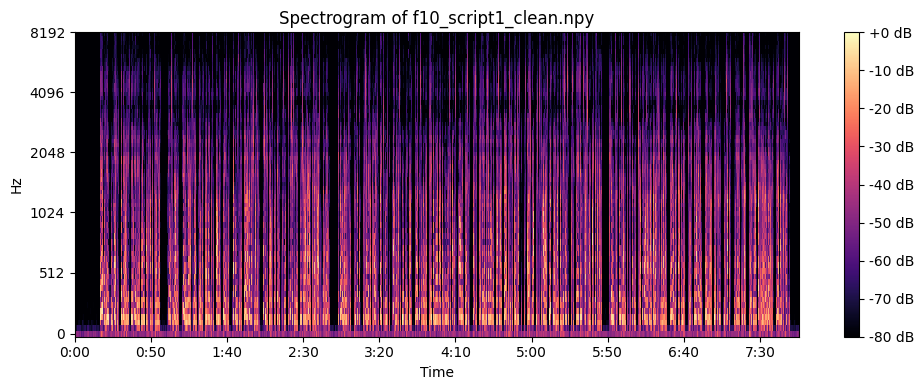

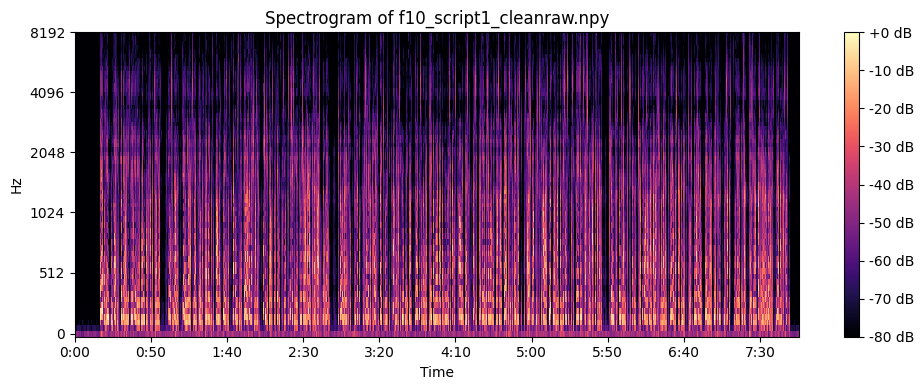

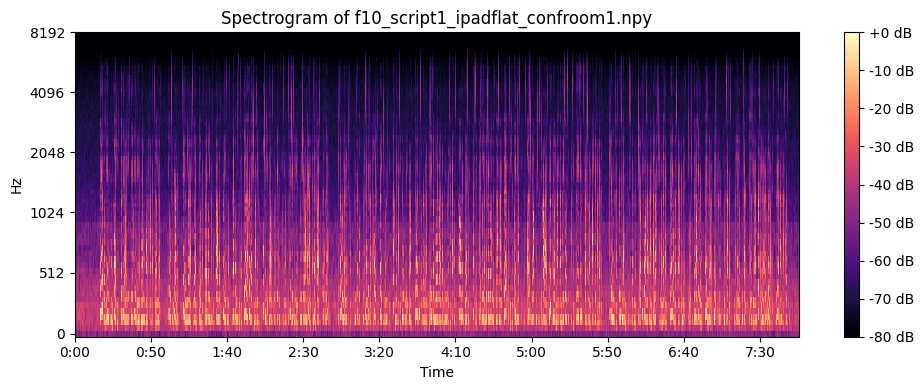

In [1]:
# Import necessary libraries and functions
from ml_project_laris import process_audio_to_spectrograms_and_save_in_chunks, load_npy_files, visualize_spectrograms

# Define directories and parameters
wav_dir = './daps'  # Directory containing raw audio files
save_dir = './npy_spectrograms'  # Directory to save processed spectrograms
cut_length = 1  # Duration of each audio segment in seconds
n_mels = 64  # Number of Mel bands for spectrograms

# Process audio into spectrograms
process_audio_to_spectrograms_and_save_in_chunks(
    wav_dir=wav_dir, sr=16000, n_mels=n_mels, cut_length=cut_length, save_dir=save_dir
)

# Load the generated spectrograms
npy_files, processed_npy_files = load_npy_files(save_dir)

# Visualize a few processed spectrograms
visualize_spectrograms(npy_files, num_to_visualize=3)

### Analysis of Unprocessed Data
After visualizing the raw spectrograms, it was evident that:
1. **Noise**: Background noise was present in several recordings, which could affect model performance.
2. **Silence**: Many recordings included unnecessary silent segments at the beginning and end.

### Preprocessing Steps
Based on this analysis, the following preprocessing steps were applied:
1. **Noise Reduction**: To improve clarity by removing background noise.
2. **Trimming Silence**: Eliminates unnecessary silent segments to focus on meaningful audio.
3. **Mel-spectrogram Conversion**: Converts audio signals into mel-scaled spectrograms for feature extraction.

Below are the examples of the processed spectrograms:

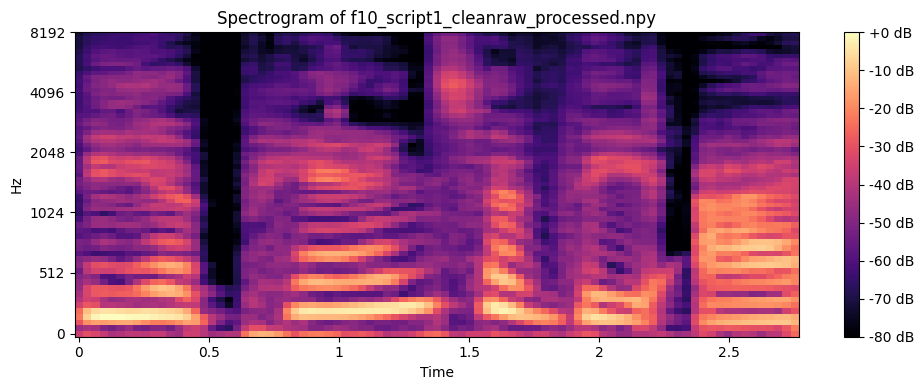

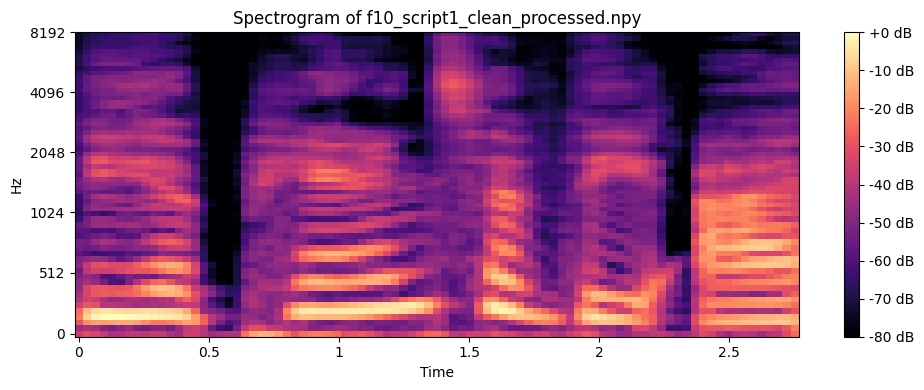

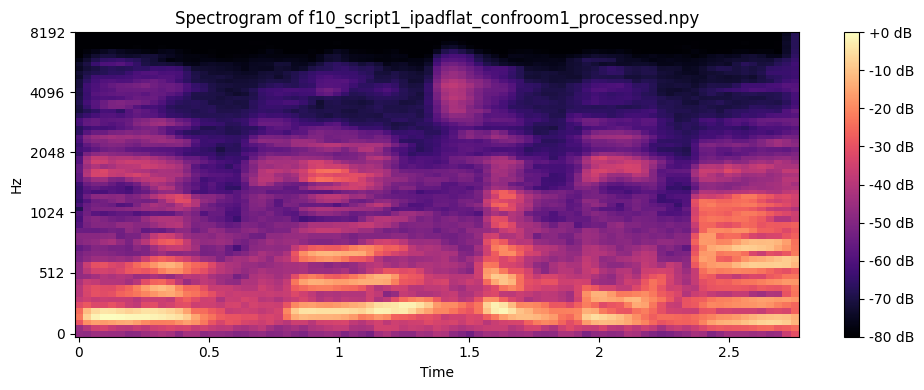

In [3]:
visualize_spectrograms(processed_npy_files, num_to_visualize=3)


This step ensures that all audio data is standardized and transformed into a format suitable for input to the CNN model.

### Segmenting Audio into 3-Second Chunks

After cleaning, audio files are segmented into fixed-length 3-second chunks.

It provides consistency Across Samples. Audio recordings can vary in length, ranging from a few seconds to several minutes. Machine learning models (like CNNs) perform better when input data has consistent dimensions. Segmenting the audio into 3-second chunks ensures uniformity in input size. Also, 3-seconds chuncks of audio are way more likely result for voice recognition type of input, since the aim is to recognise the voice. Hence, we decided to proceed with 3-seconds chuncks instead of longer chunks like 10 . If the length of the file is not a perfect multiple of 3 second, the remaining part (if shorter than 3 second) is produced by looping the audio.

### Why Mel-spectrograms?

The Mel spectrogram is used to provide our models with sound information similar to what a human would perceive. Since we know that The raw audio waveforms are passed through filter banks to obtain the Mel spectrogram.

# **Data Analysis**
## Data Splits
The dataset is split into different subsets:

Training Data: Used to train the model and adjust its parameters.
Validation Data: A portion of the data used to evaluate the model during training. This helps ensure the model isn’t overfitting to the training data.

Validation Data: A completely separate portion of the data used for the final evaluation. This shows how well the model generalizes to unseen data.
The performance metrics (F1 score) and visual tools (confusion matrix) are applied to the test data to provide an unbiased measure of the model’s effectiveness.
## Data Grouping
In order to determine how to group the data for splitting into training sets, test sets, and validation sets, we explored various features. These features included 'y_mean', 'y_std', 'y_iqr', 'y_skew', 'y_kurt', frequency distribution by gender, and more. We analyzed these features to understand the patterns and distributions within the data. However, after careful consideration, we decided to base our grouping on MFCC clustering. MFCC (Mel-frequency cepstral coefficients) is a widely used feature extraction technique in audio processing. By clustering the data based on MFCCs, we can capture the unique characteristics of each audio sample and ensure that similar samples are grouped together. This approach allows us to create more meaningful and representative training, test, and validation sets. Grouping the data is essential for training machine learning models as it helps in evaluating the model's performance on unseen data and prevents overfitting.

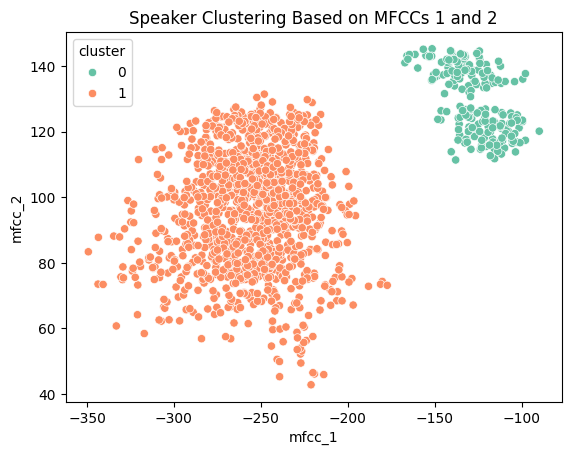

In [ ]:
sns.scatterplot(
    x=features_df["mfcc_1"], 
    y=features_df["mfcc_2"], 
    hue=features_df["cluster"], 
    palette="Set2"
)
plt.title("Speaker Clustering Based on MFCCs 1 and 2")
plt.show()

## Model Training and Comparison

To train the models on the spectrograms with the data categorized into two classes (Class 0 and Class 1), we compared three different models: a Simple CNN with Dropout, MLP, and ResNet models.

### Simple CNN with Dropout
The Simple CNN model with Dropout is a basic convolutional neural network architecture that includes dropout layers to prevent overfitting. The model consists of multiple convolutional layers followed by max-pooling layers, flattening the output, and passing it through fully connected layers. Dropout layers are added to randomly drop a certain percentage of the neurons during training, reducing the model's reliance on specific features and improving generalization.

### MLP (Multi-Layer Perceptron)
The MLP model is a fully connected neural network architecture that consists of multiple hidden layers with non-linear activation functions. Each layer is fully connected to the next layer, and the output layer provides the final classification. The MLP model is known for its ability to learn complex patterns and relationships in the data.

### ResNet (Residual Neural Network)
The ResNet model is a deep convolutional neural network architecture that introduces residual connections. Residual connections allow the model to learn residual mappings, making it easier to train deeper networks. The ResNet model consists of multiple residual blocks, each containing convolutional layers, batch normalization, and skip connections.

We trained each model using the spectrograms as input and the corresponding class labels (Class 0 or Class 1) as the target variable. The models were trained using a suitable optimizer (e.g., Adam) and a suitable loss function (e.g., binary cross-entropy). The training process involved iterating over the training data for multiple epochs, adjusting the model's weights based on the calculated loss, and evaluating the model's performance on validation data.

After training the models, we compared their performance based on various evaluation metrics such as accuracy, precision, recall, and F1 score. The model with the highest performance on the validation data was selected as the final model for further evaluation and testing.

By comparing the performance of the Simple CNN with Dropout, MLP, and ResNet models, we can determine which model architecture is most suitable for the given voice recognition task which was the ResNet model.

Total .wav files found: 1515
All spectrograms processed and saved.
Total .npy files found: 1500

=== Training and estimation: SimpleCNN ===
Epoch 1/10, Loss: 0.7927
Epoch 2/10, Loss: 0.5138
Epoch 3/10, Loss: 0.3962
Epoch 4/10, Loss: 0.2967
Epoch 5/10, Loss: 0.2013
Epoch 6/10, Loss: 0.1561
Epoch 7/10, Loss: 0.1457
Epoch 8/10, Loss: 0.1446
Epoch 9/10, Loss: 0.1405
Epoch 10/10, Loss: 0.1374
SimpleCNN: F1-оценка = 0.9467

=== Training and estimation: MLP ===
Epoch 1/10, Loss: 0.7862
Epoch 2/10, Loss: 0.7024
Epoch 3/10, Loss: 0.5487
Epoch 4/10, Loss: 0.5211
Epoch 5/10, Loss: 0.4699
Epoch 6/10, Loss: 0.4057
Epoch 7/10, Loss: 0.3720
Epoch 8/10, Loss: 0.3718
Epoch 9/10, Loss: 0.3651
Epoch 10/10, Loss: 0.3549
MLP: F1-оценка = 0.8475

=== Training and estimation: ResNet ===
Epoch 1/10, Loss: 0.3905
Epoch 2/10, Loss: 0.1317
Epoch 3/10, Loss: 0.1092
Epoch 4/10, Loss: 0.1016
Epoch 5/10, Loss: 0.0557
Epoch 6/10, Loss: 0.0123
Epoch 7/10, Loss: 0.0069
Epoch 8/10, Loss: 0.0048
Epoch 9/10, Loss: 0.0036


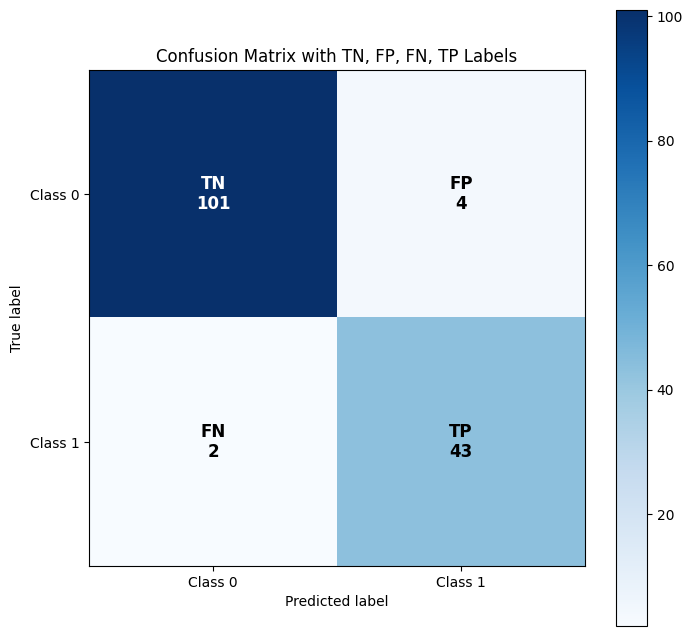

In [ ]:
if __name__ == "__main__":
    wav_dir = '/content/drive/MyDrive/voice_recognition/daps'
    save_dir = '/content/drive/MyDrive/voice_recognition/npy_spectograms_last_last'
    cut_length = 3
    n_mels = 64
    process_audio_to_spectrograms_and_save_in_chunks(wav_dir, sr=16000, n_mels=n_mels, cut_length=cut_length, save_dir=save_dir)
    npy_files, processed_npy_files = load_npy_files(save_dir)
    processed_spectrograms = [load_spectrogram_from_npy(file) for file in processed_npy_files if load_spectrogram_from_npy(file) is not None]
    raw_data_spectrograms = [load_spectrogram_from_npy(file) for file in npy_files if load_spectrogram_from_npy(file) is not None]

    labels = assign_labels_from_npy(processed_npy_files)
    # print("Statistics for Processed Spectrograms:")
    # calculate_spectrogram_stats(processed_spectrograms)
    # print("Statistics for Raw Spectrograms:")
    # calculate_spectrogram_stats(raw_data_spectrograms)
    train_val_spectrograms, test_spectrograms, train_val_labels, test_labels = train_test_split(processed_spectrograms, labels, test_size=0.2, random_state=42, stratify=labels)
    train_spectrograms, val_spectrograms, train_labels, val_labels = train_test_split(train_val_spectrograms, train_val_labels, test_size=0.125, random_state=42, stratify=train_val_labels)
    # 0.125 * 80% = 10%
    train_dataset = SpectrogramDataset(train_spectrograms, train_labels)
    val_dataset = SpectrogramDataset(val_spectrograms, val_labels)
    test_dataset = SpectrogramDataset(test_spectrograms, test_labels)
    train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    best_model = compare_models(train_loader, val_loader, labels)
    model_save_path = './best_model.pth'

    save_model_neural(best_model, model_save_path)
    print(f"Model saved to: {model_save_path}")

    f1_val = calculate_f1_score(best_model, val_loader, device)
    print(f"f1-score on validation_set (10%): {f1_val:.4f}")

    f1_test = calculate_f1_score(best_model, test_loader, device)
    print(f"f1-score on test_set (20%): {f1_test:.4f}")

    file_ids = [os.path.basename(file) for file in processed_npy_files]

    print("Tracking most and least difficult samples on validation set:")
    track_difficult_samples(best_model, val_loader, device, file_ids)

    print("Confusion Matrix on Validation Set:")
    class_names = ['Class 0', 'Class 1']

    plot_confusion_matrix(best_model, val_loader, device, class_names)


## Pruning and Fine-tuning the ResNet Model

### Pruning
Pruning is a technique used to reduce the size and computational requirements of a neural network by removing unnecessary connections or parameters. This process eliminates redundant information and focuses on retaining the most critical features, enabling accurate predictions while optimizing efficiency.

In our approach, we employed layer-wise pruning for the following reasons:

**Fair Distribution of Sparsity**
Global pruning often results in an uneven distribution of sparsity, with layers containing more parameters dominating the pruning process, leaving smaller layers minimally affected. Layer-wise pruning addresses this by ensuring that sparsity is distributed fairly across all layers. This balanced approach helps maintain a uniform reduction in parameters while preserving the structural integrity of the network.

**Preserving Model Performance**
Layer-wise pruning ensures that every layer retains a minimum number of parameters, which is critical for maintaining essential features and overall model performance. By pruning each layer individually, we selectively remove less significant weights while retaining those that are crucial for accurate predictions. This selective approach minimizes the risk of degrading model performance.

**Considerations Against Global Pruning**
Global pruning, though straightforward, often leads to an aggressive removal of parameters, potentially compromising the contributions of smaller but essential layers. By adopting layer-wise pruning, we maintain a controlled reduction process that respects the unique importance of each layer in the network.

**Pruning Criterion: L1-Norm**
For layer-wise pruning, we utilized the L1-norm pruning criterion, which removes weights with the smallest magnitude in each layer. These smaller weights contribute the least to the network's output and can be safely pruned without significantly affecting the model's performance. This criterion effectively identifies and removes redundant parameters.

**Consistent Pruning Amount**
To achieve a uniform level of sparsity across the network, we pruned each layer by the same percentage (e.g., 50%). This consistency ensures that all layers contribute equally to the network's overall sparsity, facilitating efficient computation and storage while avoiding imbalances that might arise from disproportionate pruning.

By employing layer-wise pruning with the L1-norm criterion and a consistent pruning amount, we successfully optimized the ResNet model. This approach allowed us to reduce computational demands while preserving the model's accuracy and ensuring that each layer maintained its contribution to the overall performance.

### Fine-tuning

Fine-tuning is the process of further optimizing a pre-trained model on a specific task or dataset. It involves training the model on new data while keeping the pre-trained weights as a starting point. Fine-tuning allows the model to adapt to the specific characteristics of the new dataset and improve its performance.

By combining pruning and fine-tuning techniques, we were able to optimize the ResNet model for our specific voice recognition task. This resulted in a more efficient and accurate model that could effectively classify voice samples into the desired classes.

In [ ]:
f1_pruned, fine_tuned_model = fine_tune_pruned_model(pruned_model, train_loader, val_loader, num_epochs=5)
print(f"F1-score of the pruned one after the re-training: {f1_pruned:.4f}")


Fine-tuning the pruned model...
Epoch 1/5, Loss: 2.3178
Epoch 2/5, Loss: 0.4543
Epoch 3/5, Loss: 0.3404
Epoch 4/5, Loss: 0.2791
Epoch 5/5, Loss: 0.2226
F1-score обрезанной модели после дообучения: 0.9757


# Lottery Model

After we fine tuned and pruned our resnet model, we reset the weights and retrained it from the beginning

In [ ]:
reinitialized_model = reset_pruned_weights(fine_tuned_model)
f1_lottery, lottery_model = train_and_evaluate(reinitialized_model, train_loader, val_loader, train_labels, num_epochs=10)
print(f"F1-score reinitialized model (LUCKY Lottery Ticket): {f1_lottery:.4f}")


Resetting pruned weights to their original initialization...
Epoch 1/10, Loss: 3.1980
Epoch 2/10, Loss: 0.0465
Epoch 3/10, Loss: 0.0124
Epoch 4/10, Loss: 0.0029
Epoch 5/10, Loss: 0.0008
Epoch 6/10, Loss: 0.0005
Epoch 7/10, Loss: 0.0005
Epoch 8/10, Loss: 0.0005
Epoch 9/10, Loss: 0.0004
Epoch 10/10, Loss: 0.0004
F1-score реинициализированной модели (Lottery Ticket): 0.9683


# **Results**

### Baseline ResNet
The baseline ResNet model achieved an **F1-Score of 0.9760**. This performance represents the full model before any pruning was applied and serves as the baseline for comparison.

### Fine-Tuned Pruned Model
The fine-tuned pruned model achieved an **F1-Score of 0.9757**. In this experiment, 50% of the model weights were pruned, and the resulting model was fine-tuned. Despite the significant reduction in parameters, the performance remained nearly identical to the baseline. This result demonstrates that pruning effectively removed less important weights while preserving the model's capacity to perform well.

### Lottery-Ticket Hypothesis
The lottery-ticket hypothesis experiment achieved an **F1-Score of 0.9683**. In this case, the pruned model's weights were reset to their original initialization, and the model was retrained from scratch. While the F1-Score dropped slightly compared to the baseline, this was expected due to the reduced network size. Nonetheless, the pruned network still performed exceptionally well given its smaller parameter count.

### Comparative Analysis
The results indicate the following key insights:
- **Pruning Effectiveness**: Pruning removed a significant portion of the weights without a substantial loss in performance, showcasing the network's redundancy and robustness.
- **Lottery-Ticket Viability**: Resetting and retraining the pruned model demonstrated that smaller networks can achieve near-baseline performance when initialized correctly.
- **Efficiency Gains**: The pruned models are smaller and more computationally efficient, making them better suited for deployment in resource-constrained environments.

# **Tests**

**Model Robustness Testing**

Testing the model involves simulating real-world scenarios where users provide inputs that may vary significantly from the training data. The following tests were conducted to assess the model's robustness using various augmentation techniques such as frequency masking, time masking, noise injection, speed perturbation, reverberation, and silence injection.

---

### **1. Frequency Masking**
Frequency masking simulates missing frequency bands in audio signals due to microphone limitations or environmental factors.

- **f1_script2_ipad_office1.wav** - Predicted class: **1 (t)**
- **f2_script4_ipad_confroom2.wav** - Predicted class: **0 (t)**
- **f1_script2_iphone_balcony1.wav** - Predicted class: **0 (f)**
- **f6_script1_ipad_confroom2.wav** - Predicted class: **0 (t)**
- **f9_script2_ipad_confroom2.wav** - Predicted class: **0 (t)**
- **m3_script5_ipad_confroom2.wav** - Predicted class: **1 (t)**

---

### **2. Time Masking**
Time masking mimics real-world scenarios where portions of the audio signal are removed or silenced.

- **f1_script4_ipad_balcony1.wav** - Predicted class: **1 (t)**
- **f2_script4_ipad_confroom2.wav** - Predicted class: **0 (t)**
- **f6_script1_ipad_confroom2.wav** - Predicted class: **1 (t)**
- **f9_script2_ipad_confroom2.wav** - Predicted class: **0 (t)**
- **f10_script5_ipadflat_confroom1.wav** - Predicted class: **0 (t)**
- **m3_script5_ipad_confroom2.wav** - Predicted class: **1 (t)**

---

### **3. Noise Injection**
Adding noise simulates real-world conditions, including background chatter, machinery, and environmental noise.

- **f1_script4_ipad_confroom2_AirConditioner_1_noise_20pct.wav** - Predicted class: **0 (f)**
- **f2_script1_ipad_office1_Typing_1_noise_20pct.wav** - Predicted class: **0 (t)**
- **f6_script1_ipad_confroom2_ShuttingDoor_1_noise_20pct.wav** - Predicted class: **1 (f)**
- **f9_script2_ipad_confroom2_AirConditioner_1_noise_20pct.wav** - Predicted class: **0 (t)**
- **m3_script5_ipad_confroom2_AirportAnnouncements_9_noise_20pct.wav** - Predicted class: **1 (t)**
- **m3_script5_ipad_confroom2_Babble_6_noise_20pct.wav** - Predicted class: **1 (t)**

---

### **4. Speed Perturbation**
Speed variations test the model’s adaptability to different speech tempos.

- **f1_script4_ipad_confroom2_faster_150pct.wav** - Predicted class: **1 (t)**
- **f2_script4_ipad_confroom2_faster_150pct.wav** - Predicted class: **0 (t)**
- **f4_script5_ipad_balcony1_faster_150pct.wav** - Predicted class: **1 (f)**
- **f6_script1_ipad_confroom2_faster_150pct.wav** - Predicted class: **0 (t)**
- **f9_script4_ipad_balcony1_faster_150pct.wav** - Predicted class: **0 (t)**
- **m3_script5_ipad_confroom2_faster_150pct.wav** - Predicted class: **1 (t)**
- **m9_script2_ipad_office1_faster_150pct.wav** - Predicted class: **0 (t)**

---

### **5. Reverberation**
Adding reverberation simulates echo-prone environments, such as large halls or empty rooms.

- **f1_script4_ipad_confroom2_reverb.wav** - Predicted class: **1 (t)**
- **f2_script4_ipad_confroom2_reverb.wav** - Predicted class: **0 (t)**
- **f4_script4_ipad_livingroom1_reverb.wav** - Predicted class: **0 (t)**
- **f9_script2_ipad_confroom2_reverb.wav** - Predicted class: **0 (t)**
- **f6_script1_ipad_confroom2_reverb.wav** - Predicted class: **0 (t)**
- **f10_script4_ipad_livingroom1_reverb.wav** - Predicted class: **0 (t)**
- **m2_script3_ipad_livingroom1_reverb.wav** - Predicted class: **0 (t)**
- **m3_script5_ipad_confroom2_reverb.wav** - Predicted class: **1 (t)**

---

### **6. Silence Injection**
Randomly silencing portions of speech to simulate inconsistent speech patterns.

- **f3_script3_iphone_balcony1_silence_1000ms.wav** - Predicted class: **0 (t)**
- **f6_script1_ipad_confroom2_silence_1000ms.wav** - Predicted class: **0 (t)**
- **f10_script1_iphone_balcony1_silence_1000ms.wav** - Predicted class: **0 (t)**
- **m3_script5_ipad_confroom2_silence_1000ms.wav** - Predicted class: **1 (t)**

---

### **Test Summary**
Total recordings tested: **37**
- **True (t) Predictions:** 33 (89.2%)
- **False (f) Predictions:** 4 (10.8%)

These tests demonstrate the model's ability to handle various real-world challenges. The overall accuracy under these simulated conditions suggests that the model is robust but may require further fine-tuning for specific scenarios where false predictions were observed.

# **Conclusion**

This project successfully developed and evaluated a machine learning module for voice-based access control. The experiments demonstrated that pruning techniques can significantly reduce model size without sacrificing performance, and the lottery-ticket hypothesis holds promise for creating smaller, efficient networks.